# Pratham Raj Sinha 21BIT0092

# Email Spam Detection and Prediction

# About the dataset:

Email Spam Classification Dataset
The csv file contains 5172 rows, each row for each email. There are 3002 columns. 
The first column indicates Email name. The name has been set with numbers and not recipients
name to protect privacy. The last column has the labels for prediction :
    1 for spam, 
    0 for not spam. 
The remaining 3000 columns are the 3000 most common words in all the emails

# Dataset URL

https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

# Importing libraries

In [1]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [2]:
spam = pd.read_csv('/Users/niladrisinha/Infosec da/emails.csv')
spam.describe()
spam.head()

,the,to,ect,and,for,of,a,you,hou,in,...,will,have,with,your,at,we,s,are,it,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,3,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,2,0,12,9,95,4,3,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,2,0,2,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,1,1,0,2,1,36,3,1,0
4,7,6,17,1,5,2,57,0,9,3,...,0,2,0,0,7,0,19,2,4,0


# Data description

In [3]:
spam.shape

(5172, 27)

In [4]:
# Split-out validation dataset
array = spam.values
X = array[:,0:26]
y = array[:,26]

feature_cols = ["the","to","ect","and","for","of","a","you","hou","in","on","is","this","enron","i","be","that","will","have","with","your","at","we","s","are","it"]


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=500)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)


y_pred=clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.8969072164948454


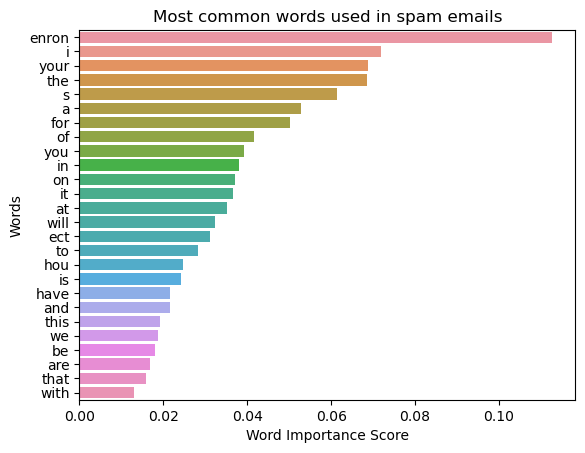

In [5]:
RandomForestClassifier()
feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp
%matplotlib inline
# Creating a bar plot
plt.figure()
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Word Importance Score')
plt.ylabel('Words')
plt.title("Most common words used in spam emails")
plt.show()

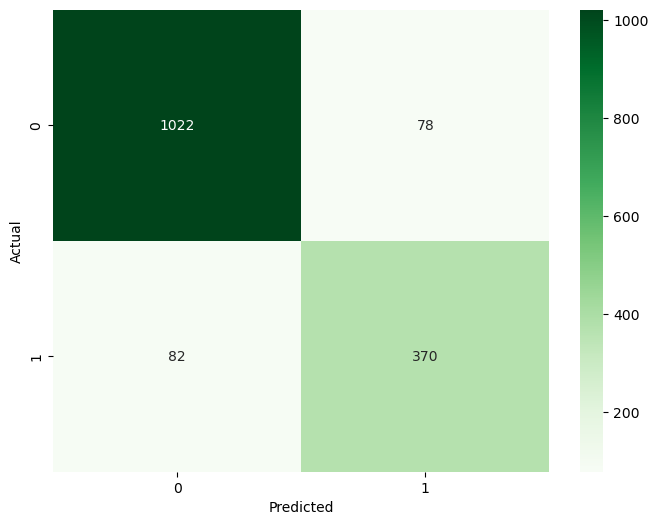

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1100
           1       0.83      0.82      0.82       452

    accuracy                           0.90      1552
   macro avg       0.88      0.87      0.87      1552
weighted avg       0.90      0.90      0.90      1552



In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

report = classification_report(y_test, y_pred)

# Classification report
print(report)

In [7]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)
print("True Positive:", TP)

Total = TN+TP+FP+FN
Accuracy = (TP+TN)/(Total)
print("Accuracy= ",Accuracy)
print("")
ER = (FP+FN)/(Total)
print("Error rate= ",ER)
print("")
TPR = TP/(TP+FN)
print("Sensitivity/TPR= ",TPR)
print("")
TNR = TN/(FP+TN)
print("Specificity/TNR= ",TNR)
print("")
FPR = 1 - TNR
print("FPR= ",FPR)
print("")
FNR = 1 - TPR
print("Miss rate/FNR= ",FNR)
print("")


True Negative: 1022
False Positive: 78
False Negative: 82
True Positive: 370
Accuracy=  0.8969072164948454

Error rate=  0.10309278350515463

Sensitivity/TPR=  0.8185840707964602

Specificity/TNR=  0.9290909090909091

FPR=  0.07090909090909092

Miss rate/FNR=  0.18141592920353977



In [8]:
if metrics.accuracy_score(y_test, y_pred)== Accuracy:
    print("Calculated accuracy and predicted accuracy are equal.")

Calculated accuracy and predicted accuracy are equal.
